# 날씨에 따른 버스 승강장 이용량 수 예측 모델(Linear Regression)

## 데이터 불러오기

In [2]:
import numpy as np
import pandas as pd
bus_df = pd.read_csv(r'bus.csv', encoding = "euc-kr")
bus_df = bus_df[bus_df['일반승차인원'] > 10000]
print(bus_df.shape)
bus_df

(894, 15)


,Unnamed: 0,일자,구,일반승차인원,일반하차인원,일반환승인원,청소년승차인원,청소년하차인원,청소년환승인원,어린이승차인원,어린이하차인원,어린이환승인원,미분류승차인원,미분류하차인원,미분류환승인원
0,0,2023년 03월 01일,동구,100600,87257,21418,105494,90962,22254,101352,87904,21496,100732,87357,21418
1,1,2023년 03월 01일,서구,127262,110789,29925,135259,116997,31205,128399,111759,30057,127352,110845,29925
2,2,2023년 03월 01일,중구,74800,67462,14250,79516,70979,14776,75682,68218,14331,74844,67497,14250
3,3,2023년 03월 01일,대덕구,40925,36651,7453,43122,38227,7792,41254,36899,7469,40955,36676,7453
4,4,2023년 03월 01일,유성구,79446,73214,15782,84167,77167,16600,80264,73987,15906,79491,73248,15782
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
954,954,2023년 09월 07일,유성구,152698,138565,32942,160752,144967,34214,153366,139164,32989,152698,138565,32942
955,955,2023년 09월 08일,동구,172094,152675,42344,181052,159272,43949,172772,153266,42402,172131,152743,42344
956,956,2023년 09월 08일,서구,250800,219457,61291,262961,228697,63201,251849,220306,61394,250800,219457,61291
957,957,2023년 09월 08일,중구,133494,123216,29042,142774,129320,30328,134243,123795,29104,133494,123216,29042


In [3]:
wether = pd.read_csv(r'대전날씨2월9월.csv',encoding="euc-kr")
print(wether.shape)

wether_ch = pd.DataFrame(wether)

wether_ch['일시'] = pd.to_datetime(wether_ch['일시']).dt.strftime('%Y년 %m월 %d일')

wether_ch

(191, 12)


,지점명,일시,평균기온(°C),최저기온(°C),최고기온(°C),강수 계속시간(hr),일강수량(mm),최소 상대습도(%),평균 상대습도(%),가조시간(hr),평균 지면온도(°C),기사
0,대전,2023년 03월 01일,6.6,2.1,11.6,NaN,NaN,28,52.5,11.4,6.6,{연무}1415-{연무}{강도0}1500-1540.
1,대전,2023년 03월 02일,2.3,-1.6,7.7,NaN,NaN,13,25.9,11.4,4.8,NaN
2,대전,2023년 03월 03일,4.2,-4.1,13.3,NaN,NaN,20,45.9,11.5,5.8,NaN
3,대전,2023년 03월 04일,6.4,-0.5,14.2,NaN,NaN,24,53.3,11.5,7.2,{햇무리}1345-1430.
4,대전,2023년 03월 05일,7.9,-0.6,17.2,NaN,NaN,17,41.0,11.5,8.4,{연무}0840-{연무}{강도0}0900-1015. {연무}1205-1425.
...,...,...,...,...,...,...,...,...,...,...,...,...
186,대전,2023년 09월 03일,27.0,22.3,32.5,NaN,NaN,52,74.5,12.9,30.7,{달코로나}2205-2320.
187,대전,2023년 09월 04일,27.4,24.0,31.5,NaN,NaN,57,75.3,12.9,29.8,{달코로나}0245-0340. {달코로나}0440-0530. {해코로나}0650-0...
188,대전,2023년 09월 05일,26.9,23.8,31.2,NaN,NaN,48,66.8,12.8,30.7,{달코로나}0255-0330.
189,대전,2023년 09월 06일,26.0,21.0,31.3,NaN,NaN,48,67.6,12.8,29.2,NaN


## 데이터 전처리

In [4]:
bus_df.isnull().sum()

Unnamed: 0    0
일자            0
구             0
일반승차인원        0
일반하차인원        0
일반환승인원        0
청소년승차인원       0
청소년하차인원       0
청소년환승인원       0
어린이승차인원       0
어린이하차인원       0
어린이환승인원       0
미분류승차인원       0
미분류하차인원       0
미분류환승인원       0
dtype: int64

In [5]:
bus_df1 = bus_df.drop("어린이승차인원", axis = 1)
bus_df1.head()

,Unnamed: 0,일자,구,일반승차인원,일반하차인원,일반환승인원,청소년승차인원,청소년하차인원,청소년환승인원,어린이하차인원,어린이환승인원,미분류승차인원,미분류하차인원,미분류환승인원
0,0,2023년 03월 01일,동구,100600,87257,21418,105494,90962,22254,87904,21496,100732,87357,21418
1,1,2023년 03월 01일,서구,127262,110789,29925,135259,116997,31205,111759,30057,127352,110845,29925
2,2,2023년 03월 01일,중구,74800,67462,14250,79516,70979,14776,68218,14331,74844,67497,14250
3,3,2023년 03월 01일,대덕구,40925,36651,7453,43122,38227,7792,36899,7469,40955,36676,7453
4,4,2023년 03월 01일,유성구,79446,73214,15782,84167,77167,16600,73987,15906,79491,73248,15782


In [6]:
bus_df2 = bus_df1.drop("어린이하차인원", axis = 1)
bus_df2.head()

,Unnamed: 0,일자,구,일반승차인원,일반하차인원,일반환승인원,청소년승차인원,청소년하차인원,청소년환승인원,어린이환승인원,미분류승차인원,미분류하차인원,미분류환승인원
0,0,2023년 03월 01일,동구,100600,87257,21418,105494,90962,22254,21496,100732,87357,21418
1,1,2023년 03월 01일,서구,127262,110789,29925,135259,116997,31205,30057,127352,110845,29925
2,2,2023년 03월 01일,중구,74800,67462,14250,79516,70979,14776,14331,74844,67497,14250
3,3,2023년 03월 01일,대덕구,40925,36651,7453,43122,38227,7792,7469,40955,36676,7453
4,4,2023년 03월 01일,유성구,79446,73214,15782,84167,77167,16600,15906,79491,73248,15782


In [7]:
bus_df3 = bus_df2.drop("어린이환승인원", axis = 1)
bus_df3.head()

,Unnamed: 0,일자,구,일반승차인원,일반하차인원,일반환승인원,청소년승차인원,청소년하차인원,청소년환승인원,미분류승차인원,미분류하차인원,미분류환승인원
0,0,2023년 03월 01일,동구,100600,87257,21418,105494,90962,22254,100732,87357,21418
1,1,2023년 03월 01일,서구,127262,110789,29925,135259,116997,31205,127352,110845,29925
2,2,2023년 03월 01일,중구,74800,67462,14250,79516,70979,14776,74844,67497,14250
3,3,2023년 03월 01일,대덕구,40925,36651,7453,43122,38227,7792,40955,36676,7453
4,4,2023년 03월 01일,유성구,79446,73214,15782,84167,77167,16600,79491,73248,15782


In [8]:
bus_df4 = bus_df3.drop("미분류승차인원", axis = 1)
bus_df4.head()

,Unnamed: 0,일자,구,일반승차인원,일반하차인원,일반환승인원,청소년승차인원,청소년하차인원,청소년환승인원,미분류하차인원,미분류환승인원
0,0,2023년 03월 01일,동구,100600,87257,21418,105494,90962,22254,87357,21418
1,1,2023년 03월 01일,서구,127262,110789,29925,135259,116997,31205,110845,29925
2,2,2023년 03월 01일,중구,74800,67462,14250,79516,70979,14776,67497,14250
3,3,2023년 03월 01일,대덕구,40925,36651,7453,43122,38227,7792,36676,7453
4,4,2023년 03월 01일,유성구,79446,73214,15782,84167,77167,16600,73248,15782


In [9]:
bus_df5 = bus_df4.drop("미분류하차인원", axis = 1)
bus_df5.head()

,Unnamed: 0,일자,구,일반승차인원,일반하차인원,일반환승인원,청소년승차인원,청소년하차인원,청소년환승인원,미분류환승인원
0,0,2023년 03월 01일,동구,100600,87257,21418,105494,90962,22254,21418
1,1,2023년 03월 01일,서구,127262,110789,29925,135259,116997,31205,29925
2,2,2023년 03월 01일,중구,74800,67462,14250,79516,70979,14776,14250
3,3,2023년 03월 01일,대덕구,40925,36651,7453,43122,38227,7792,7453
4,4,2023년 03월 01일,유성구,79446,73214,15782,84167,77167,16600,15782


In [10]:
bus_df6 = bus_df5.drop("미분류환승인원", axis = 1)
bus_df6.head()

,Unnamed: 0,일자,구,일반승차인원,일반하차인원,일반환승인원,청소년승차인원,청소년하차인원,청소년환승인원
0,0,2023년 03월 01일,동구,100600,87257,21418,105494,90962,22254
1,1,2023년 03월 01일,서구,127262,110789,29925,135259,116997,31205
2,2,2023년 03월 01일,중구,74800,67462,14250,79516,70979,14776
3,3,2023년 03월 01일,대덕구,40925,36651,7453,43122,38227,7792
4,4,2023년 03월 01일,유성구,79446,73214,15782,84167,77167,16600


In [11]:
bus_df6

,Unnamed: 0,일자,구,일반승차인원,일반하차인원,일반환승인원,청소년승차인원,청소년하차인원,청소년환승인원
0,0,2023년 03월 01일,동구,100600,87257,21418,105494,90962,22254
1,1,2023년 03월 01일,서구,127262,110789,29925,135259,116997,31205
2,2,2023년 03월 01일,중구,74800,67462,14250,79516,70979,14776
3,3,2023년 03월 01일,대덕구,40925,36651,7453,43122,38227,7792
4,4,2023년 03월 01일,유성구,79446,73214,15782,84167,77167,16600
...,...,...,...,...,...,...,...,...,...
954,954,2023년 09월 07일,유성구,152698,138565,32942,160752,144967,34214
955,955,2023년 09월 08일,동구,172094,152675,42344,181052,159272,43949
956,956,2023년 09월 08일,서구,250800,219457,61291,262961,228697,63201
957,957,2023년 09월 08일,중구,133494,123216,29042,142774,129320,30328


In [12]:
wether_df = wether_ch.drop("최저기온(°C)",axis=1)
wether_df = wether_df.drop("최고기온(°C)",axis=1)
wether_df = wether_df.drop("강수 계속시간(hr)",axis=1)
wether_df = wether_df.drop("기사",axis=1)
wether_df = wether_df.drop("지점명",axis=1)
wether_df = wether_df.drop("최소 상대습도(%)",axis=1)
wether_df = wether_df.drop("평균 상대습도(%)",axis=1)
wether_df

,일시,평균기온(°C),일강수량(mm),가조시간(hr),평균 지면온도(°C)
0,2023년 03월 01일,6.6,NaN,11.4,6.6
1,2023년 03월 02일,2.3,NaN,11.4,4.8
2,2023년 03월 03일,4.2,NaN,11.5,5.8
3,2023년 03월 04일,6.4,NaN,11.5,7.2
4,2023년 03월 05일,7.9,NaN,11.5,8.4
...,...,...,...,...,...
186,2023년 09월 03일,27.0,NaN,12.9,30.7
187,2023년 09월 04일,27.4,NaN,12.9,29.8
188,2023년 09월 05일,26.9,NaN,12.8,30.7
189,2023년 09월 06일,26.0,NaN,12.8,29.2


In [13]:
mergebus_df = bus_df6.merge(wether_df, left_on=['일자'], right_on=['일시'], how='left')
mergebus_df = mergebus_df.drop("일시",axis=1)
mergebus_df = mergebus_df.drop("Unnamed: 0",axis=1)

mergebus_df = mergebus_df[mergebus_df['일자'] != "2023년 09월 08일"]

mergebus_df['일강수량(mm)'].fillna(0.0, inplace=True)

mergebus_df

,일자,구,일반승차인원,일반하차인원,일반환승인원,청소년승차인원,청소년하차인원,청소년환승인원,평균기온(°C),일강수량(mm),가조시간(hr),평균 지면온도(°C)
0,2023년 03월 01일,동구,100600,87257,21418,105494,90962,22254,6.6,0.0,11.4,6.6
1,2023년 03월 01일,서구,127262,110789,29925,135259,116997,31205,6.6,0.0,11.4,6.6
2,2023년 03월 01일,중구,74800,67462,14250,79516,70979,14776,6.6,0.0,11.4,6.6
3,2023년 03월 01일,대덕구,40925,36651,7453,43122,38227,7792,6.6,0.0,11.4,6.6
4,2023년 03월 01일,유성구,79446,73214,15782,84167,77167,16600,6.6,0.0,11.4,6.6
...,...,...,...,...,...,...,...,...,...,...,...,...
885,2023년 09월 07일,동구,164744,146653,43207,173407,153069,44823,25.0,0.0,12.8,30.5
886,2023년 09월 07일,서구,243319,212731,59791,254763,221277,61578,25.0,0.0,12.8,30.5
887,2023년 09월 07일,중구,130540,118669,29524,139576,124670,30853,25.0,0.0,12.8,30.5
888,2023년 09월 07일,대덕구,83243,74603,17208,88149,77898,17796,25.0,0.0,12.8,30.5


In [14]:
mergebus_df.to_csv(r'최종데이터.csv')

In [15]:
pre_month = mergebus_df.loc[0,'일자'].split(' ')[1]
month = mergebus_df.loc[0,'일자'].split(' ')[1]
date = mergebus_df.loc[0,'일자']
temp = mergebus_df.loc[0,'평균기온(°C)']
pds = mergebus_df.loc[0,'가조시간(hr)']
temp_list = []
pds_list = []
month_list = []
person = mergebus_df.loc[0,'일반승차인원']
person_list = []
month_person = 0
n = 0
for i in range(1,len(mergebus_df)):
    if mergebus_df.loc[i,'일자']==date:
        person = person+mergebus_df.loc[i,'일반승차인원']+mergebus_df.loc[i,'청소년승차인원']
    else :
        month = mergebus_df.loc[i,'일자'].split(' ')[1]
        date = mergebus_df.loc[i,'일자']
        if pre_month != month :
            
            temp_list.append(round(temp/n,1))
            pds_list.append(round(pds/n,1))
            person_list.append(round(month_person/n))
            month_list.append(pre_month)
            n=0
            pre_month = month
            month_person = 0
            temp = mergebus_df.loc[i,'평균기온(°C)']
            pds = mergebus_df.loc[i,'가조시간(hr)']
        
        else:
            temp = temp+mergebus_df.loc[i,'평균기온(°C)']
            pds = pds+mergebus_df.loc[i,'가조시간(hr)']
            person = person/5
            month_person = month_person+person
            person = mergebus_df.loc[i,'일반승차인원']+mergebus_df.loc[i,'청소년승차인원']
            n=n+1
    
    
print(month_list)
print('일반탑승인원 :',person_list)
print('평균 온도 : ',temp_list)
print('가조시간: ',pds_list)

['03월', '04월', '05월', '06월', '07월', '08월']
일반탑승인원 : [260109, 274613, 269981, 269683, 257199, 256599]
평균 온도 :  [10.2, 14.2, 19.1, 24.4, 26.7, 27.9]
가조시간:  [12.4, 13.6, 14.7, 15.1, 14.9, 14.0]


In [16]:
data = {'월': month_list, '탑승인원': person_list, '평균 온도' : temp_list, '가조시간' : pds_list}
df = pd.DataFrame(data)

df = df.set_index('월')
df

,탑승인원,평균 온도,가조시간
월,,,
03월,260109,10.2,12.4
04월,274613,14.2,13.6
05월,269981,19.1,14.7
06월,269683,24.4,15.1
07월,257199,26.7,14.9
08월,256599,27.9,14.0


In [17]:
import matplotlib.pyplot as plt

In [18]:
plt.rcParams['font.family'] = 'AppleGothic'  

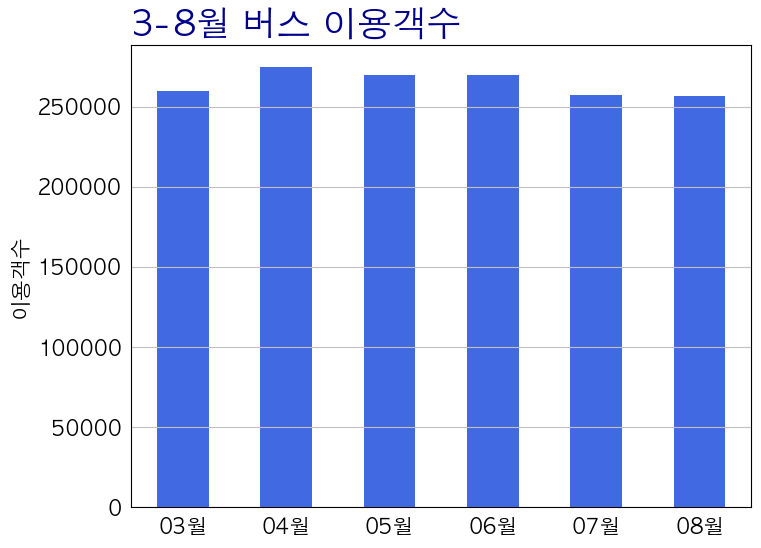

In [19]:
ax = df['탑승인원'].plot.bar(rot=0,                     # Rotation for ticks
                      color="royalblue",         # The color for each of the DataFrame’s columns.
                      figsize=(8, 6),            # Size of a figure object. (a tuple (width, height) in inches)
                      fontsize=15)  # 색상
ax.set_title("3-8월 버스 이용객수", loc="left",                         # Which title to set.
             color="darkblue",                   # color
             fontsize=25)               # 제목
ax.set_xlabel("")                                # x축 이름
ax.set_ylabel("이용객수", fontsize=15)                     # y축 이름
ax.set_facecolor('white')                        # 배경색
ax.grid(True, axis='y', color="silver")         # 눈금선(y축)
ax.tick_params(left = False, bottom = False)   # 눈금 제거
ax.spines['bottom'].set_color('black')           # x축 표시
ax.legend().remove()  
plt.savefig('3-8월버스이용객그래프.png')     

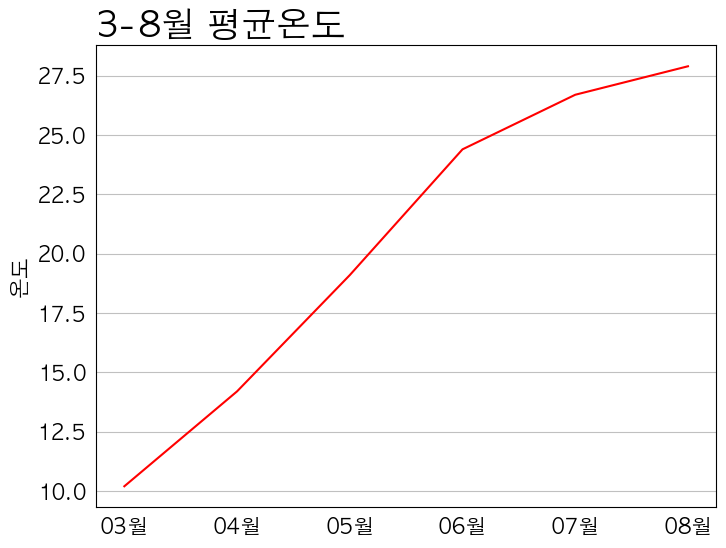

In [20]:
ax_temp = df['평균 온도'].plot.line(rot=0,                     # Rotation for ticks
                      color="red",         # The color for each of the DataFrame’s columns.
                      figsize=(8, 6),            # Size of a figure object. (a tuple (width, height) in inches)
                      fontsize=15)  # 색상
ax_temp.set_title("3-8월 평균온도", loc="left",                         # Which title to set.
             color="black",                   # color
             fontsize=25)               # 제목
ax_temp.set_xlabel("")                                # x축 이름
ax_temp.set_ylabel("온도", fontsize=15)                     # y축 이름
ax_temp.set_facecolor('white')                        # 배경색
ax_temp.grid(True, axis='y', color="silver")         # 눈금선(y축)
ax_temp.tick_params(left = False, bottom = False)   # 눈금 제거
ax_temp.spines['bottom'].set_color('black')           # x축 표시
ax_temp.legend().remove()  
plt.savefig('3-8월평균온도그래프.png')   

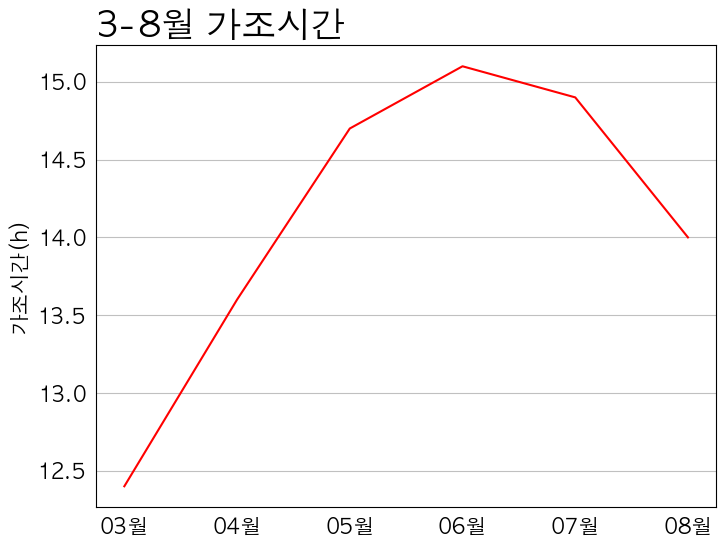

In [21]:
ax_pds = df['가조시간'].plot.line(rot=0,                     # Rotation for ticks
                      color="red",         # The color for each of the DataFrame’s columns.
                      figsize=(8, 6),            # Size of a figure object. (a tuple (width, height) in inches)
                      fontsize=15)  # 색상
ax_pds.set_title("3-8월 가조시간", loc="left",                         # Which title to set.
             color="black",                   # color
             fontsize=25)               # 제목
ax_pds.set_xlabel("")                                # x축 이름
ax_pds.set_ylabel("가조시간(h)", fontsize=15)                     # y축 이름
ax_pds.set_facecolor('white')                        # 배경색
ax_pds.grid(True, axis='y', color="silver")         # 눈금선(y축)
ax_pds.tick_params(left = False, bottom = False)   # 눈금 제거
ax_pds.spines['bottom'].set_color('black')           # x축 표시
ax_pds.legend().remove()  
plt.savefig('3-8월가조시간그래프.png')  
plt.show()

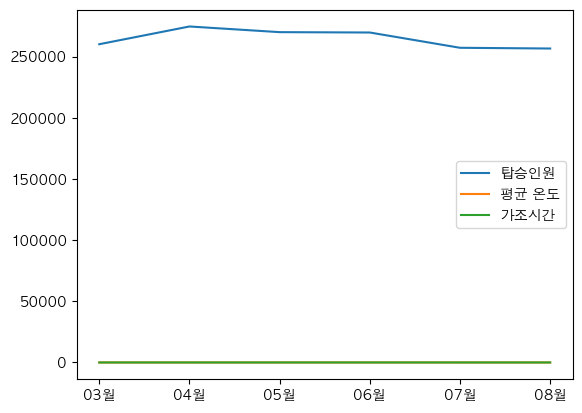

In [22]:
plt.plot(df.index, df['탑승인원'], df.index,df['평균 온도'], df.index,df['가조시간'])
plt.legend(['탑승인원', '평균 온도', '가조시간'])
plt.show()

In [23]:
n = 0
pre_month = mergebus_df.loc[0,'일자'].split(' ')[1]
month = mergebus_df.loc[0,'일자'].split(' ')[1]
date = mergebus_df.loc[0,'일자']
month_list = []
rainy_day = 0
rainy_list = []
result = []
for i in range(1,len(mergebus_df)):
    if mergebus_df.loc[i,'일자']==date:
        continue
    else :
        month = mergebus_df.loc[i,'일자'].split(' ')[1]
        date = mergebus_df.loc[i,'일자']
        if pre_month != month :
            result.append(f'{rainy_day}:{n}')
            rainy_list.append(rainy_day)
            month_list.append(pre_month)
            n=1
            pre_month = month
            if mergebus_df.loc[i,'일강수량(mm)'] >0.0:
                rainy_day = 1
            else : rainy_day = 0
        
        else:
            if mergebus_df.loc[i,'일강수량(mm)'] >0.0:
                rainy_day = rainy_day+1
            n=n+1
   
print(month_list)
print('비온날 : 전체 일수',rainy_list)
print('비온날 : 전체 일수', result)

['03월', '04월', '05월', '06월', '07월', '08월']
비온날 : 전체 일수 [2, 8, 5, 10, 22, 12]
비온날 : 전체 일수 ['2:27', '8:30', '5:22', '10:29', '22:31', '12:31']


In [24]:
data = {'월' : month_list, '비가 온 날' : rainy_list}
df = pd.DataFrame(data)
df = df.set_index('월')
df

,비가 온 날
월,
03월,2
04월,8
05월,5
06월,10
07월,22
08월,12


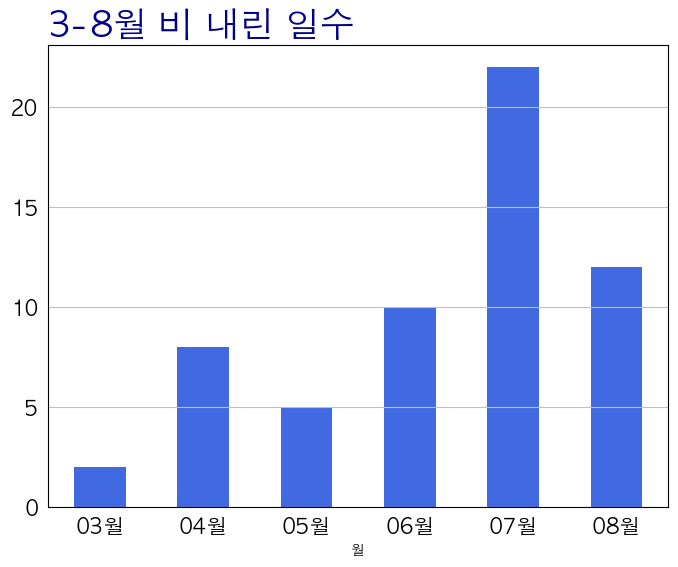

In [25]:
ax = df['비가 온 날'].plot.bar(rot=0,                     # Rotation for ticks
                      color="royalblue",         # The color for each of the DataFrame’s columns.
                      figsize=(8, 6),            # Size of a figure object. (a tuple (width, height) in inches)
                      fontsize=15)  # 색상
ax.set_title("3-8월 비 내린 일수", loc="left",                         # Which title to set.
             color="darkblue",                   # color
             fontsize=25)               # 제목                   # y축 이름
ax.set_facecolor('white')                        # 배경색
ax.grid(True, axis='y', color="silver")         # 눈금선(y축)
ax.tick_params(left = False, bottom = False)   # 눈금 제거
ax.spines['bottom'].set_color('black')           # x축 표시
ax.legend().remove()  
plt.savefig('3-8월비온날그래프.png')     

In [26]:
rain_data = mergebus_df.loc[:,['일자', '일반승차인원', '청소년승차인원','일강수량(mm)']]
rain_data

,일자,일반승차인원,청소년승차인원,일강수량(mm)
0,2023년 03월 01일,100600,105494,0.0
1,2023년 03월 01일,127262,135259,0.0
2,2023년 03월 01일,74800,79516,0.0
3,2023년 03월 01일,40925,43122,0.0
4,2023년 03월 01일,79446,84167,0.0
...,...,...,...,...
885,2023년 09월 07일,164744,173407,0.0
886,2023년 09월 07일,243319,254763,0.0
887,2023년 09월 07일,130540,139576,0.0
888,2023년 09월 07일,83243,88149,0.0


In [27]:
rainy_day_df = rain_data.loc[rain_data['일강수량(mm)']>0,:]
rainy_day_df = rainy_day_df.reset_index()
del rainy_day_df['index']
rainy_day_df

,일자,일반승차인원,청소년승차인원,일강수량(mm)
0,2023년 03월 12일,86844,91561,12.4
1,2023년 03월 12일,99989,107349,12.4
2,2023년 03월 12일,59028,63043,12.4
3,2023년 03월 12일,31464,33440,12.4
4,2023년 03월 12일,61134,65492,12.4
...,...,...,...,...
290,2023년 08월 30일,143178,150846,44.4
291,2023년 08월 30일,220690,231638,44.4
292,2023년 08월 30일,118811,127022,44.4
293,2023년 08월 30일,73527,78024,44.4


In [28]:
rainy_day_df['일자'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 295 entries, 0 to 294
Series name: 일자
Non-Null Count  Dtype 
--------------  ----- 
295 non-null    object
dtypes: object(1)
memory usage: 2.4+ KB


In [29]:
non_rainy_day_df = rain_data.loc[rain_data['일강수량(mm)']==0,:]
non_rainy_day_df = non_rainy_day_df.reset_index()
del non_rainy_day_df['index']
non_rainy_day_df

,일자,일반승차인원,청소년승차인원,일강수량(mm)
0,2023년 03월 01일,100600,105494,0.0
1,2023년 03월 01일,127262,135259,0.0
2,2023년 03월 01일,74800,79516,0.0
3,2023년 03월 01일,40925,43122,0.0
4,2023년 03월 01일,79446,84167,0.0
...,...,...,...,...
590,2023년 09월 07일,164744,173407,0.0
591,2023년 09월 07일,243319,254763,0.0
592,2023년 09월 07일,130540,139576,0.0
593,2023년 09월 07일,83243,88149,0.0


In [30]:
rainy_person = (rainy_day_df['일반승차인원'].sum() + rainy_day_df['청소년승차인원'].sum())/len(rainy_day_df)
non_rainy_person = (non_rainy_day_df['일반승차인원'].sum() + non_rainy_day_df['청소년승차인원'].sum())/len(non_rainy_day_df)

print('비 내린 날 평균 이용객 :',rainy_person)
print('비 안온 날 평균 이용객 :',non_rainy_person)


비 내린 날 평균 이용객 : 254726.57288135594
비 안온 날 평균 이용객 : 261940.52100840336


In [31]:

rainy_day6_7 = rainy_day_df[rainy_day_df['일자'].str.contains('06월') | rainy_day_df['일자'].str.contains('07월')]
rainy_day6_7

,일자,일반승차인원,청소년승차인원,일강수량(mm)
75,2023년 06월 08일,151330,159508,0.3
76,2023년 06월 08일,224998,235377,0.3
77,2023년 06월 08일,119876,128011,0.3
78,2023년 06월 08일,81064,85803,0.3
79,2023년 06월 08일,143786,151824,0.3
...,...,...,...,...
230,2023년 07월 30일,87106,90663,31.6
231,2023년 07월 30일,107625,114148,31.6
232,2023년 07월 30일,63078,66569,31.6
233,2023년 07월 30일,32902,34859,31.6


In [32]:
non_rainy_day6_7 = non_rainy_day_df[non_rainy_day_df['일자'].str.contains('06월') | non_rainy_day_df['일자'].str.contains('07월')]
non_rainy_day6_7

,일자,일반승차인원,청소년승차인원,일강수량(mm)
325,2023년 06월 01일,156183,165153,0.0
326,2023년 06월 01일,229452,241357,0.0
327,2023년 06월 01일,123305,132853,0.0
328,2023년 06월 01일,79920,84621,0.0
329,2023년 06월 01일,146847,155046,0.0
...,...,...,...,...
460,2023년 07월 31일,136480,141742,0.0
461,2023년 07월 31일,206517,215521,0.0
462,2023년 07월 31일,113729,119260,0.0
463,2023년 07월 31일,68205,70924,0.0


In [33]:
rainy_person6_7 = (rainy_day6_7['일반승차인원'].sum() + rainy_day6_7['청소년승차인원'].sum())
non_rainy_person6_7 = (non_rainy_day6_7['일반승차인원'].sum() + non_rainy_day6_7['청소년승차인원'].sum())

print('6,7월 비 내린 날 평균 이용객 :',rainy_person6_7)
print('6,7월비 안온 날 평균 이용객 :',non_rainy_person6_7)

6,7월 비 내린 날 평균 이용객 : 41138344
6,7월비 안온 날 평균 이용객 : 35617118


In [34]:
import pandas as pd

In [35]:
data = pd.read_csv(r'최종데이터.csv')
data

,Unnamed: 0,일자,구,일반승차인원,일반하차인원,일반환승인원,청소년승차인원,청소년하차인원,청소년환승인원,평균기온(°C),일강수량(mm),가조시간(hr),평균 지면온도(°C)
0,0,2023년 03월 01일,동구,100600,87257,21418,105494,90962,22254,6.6,0.0,11.4,6.6
1,1,2023년 03월 01일,서구,127262,110789,29925,135259,116997,31205,6.6,0.0,11.4,6.6
2,2,2023년 03월 01일,중구,74800,67462,14250,79516,70979,14776,6.6,0.0,11.4,6.6
3,3,2023년 03월 01일,대덕구,40925,36651,7453,43122,38227,7792,6.6,0.0,11.4,6.6
4,4,2023년 03월 01일,유성구,79446,73214,15782,84167,77167,16600,6.6,0.0,11.4,6.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,885,2023년 09월 07일,동구,164744,146653,43207,173407,153069,44823,25.0,0.0,12.8,30.5
886,886,2023년 09월 07일,서구,243319,212731,59791,254763,221277,61578,25.0,0.0,12.8,30.5
887,887,2023년 09월 07일,중구,130540,118669,29524,139576,124670,30853,25.0,0.0,12.8,30.5
888,888,2023년 09월 07일,대덕구,83243,74603,17208,88149,77898,17796,25.0,0.0,12.8,30.5


In [36]:
del data['Unnamed: 0']
data

,일자,구,일반승차인원,일반하차인원,일반환승인원,청소년승차인원,청소년하차인원,청소년환승인원,평균기온(°C),일강수량(mm),가조시간(hr),평균 지면온도(°C)
0,2023년 03월 01일,동구,100600,87257,21418,105494,90962,22254,6.6,0.0,11.4,6.6
1,2023년 03월 01일,서구,127262,110789,29925,135259,116997,31205,6.6,0.0,11.4,6.6
2,2023년 03월 01일,중구,74800,67462,14250,79516,70979,14776,6.6,0.0,11.4,6.6
3,2023년 03월 01일,대덕구,40925,36651,7453,43122,38227,7792,6.6,0.0,11.4,6.6
4,2023년 03월 01일,유성구,79446,73214,15782,84167,77167,16600,6.6,0.0,11.4,6.6
...,...,...,...,...,...,...,...,...,...,...,...,...
885,2023년 09월 07일,동구,164744,146653,43207,173407,153069,44823,25.0,0.0,12.8,30.5
886,2023년 09월 07일,서구,243319,212731,59791,254763,221277,61578,25.0,0.0,12.8,30.5
887,2023년 09월 07일,중구,130540,118669,29524,139576,124670,30853,25.0,0.0,12.8,30.5
888,2023년 09월 07일,대덕구,83243,74603,17208,88149,77898,17796,25.0,0.0,12.8,30.5


In [37]:
dongu = data.loc[data['구']=='동구', :]
seogu = data.loc[data['구']=='서구', :]
joonggu = data.loc[data['구']=='중구', :]
daedukgu = data.loc[data['구']=='대덕구', :]
youseonggu = data.loc[data['구']=='유성구', :]

In [38]:
dongu

,일자,구,일반승차인원,일반하차인원,일반환승인원,청소년승차인원,청소년하차인원,청소년환승인원,평균기온(°C),일강수량(mm),가조시간(hr),평균 지면온도(°C)
0,2023년 03월 01일,동구,100600,87257,21418,105494,90962,22254,6.6,0.0,11.4,6.6
5,2023년 03월 02일,동구,153134,135178,39531,163682,143308,41476,2.3,0.0,11.4,4.8
10,2023년 03월 03일,동구,157846,138918,38445,168149,146944,40310,4.2,0.0,11.5,5.8
15,2023년 03월 04일,동구,120663,106600,26033,125448,110436,26851,6.4,0.0,11.5,7.2
20,2023년 03월 05일,동구,98799,82763,19361,103495,86339,20139,7.9,0.0,11.5,8.4
...,...,...,...,...,...,...,...,...,...,...,...,...
865,2023년 09월 03일,동구,104456,87683,20548,108961,91083,21325,27.0,0.0,12.9,30.7
870,2023년 09월 04일,동구,163235,143941,42178,171653,150193,43657,27.4,0.0,12.9,29.8
875,2023년 09월 05일,동구,165117,145755,43302,173617,152012,44875,26.9,0.0,12.8,30.7
880,2023년 09월 06일,동구,163052,144212,42734,171862,150714,44362,26.0,0.0,12.8,29.2


In [39]:
seogu

,일자,구,일반승차인원,일반하차인원,일반환승인원,청소년승차인원,청소년하차인원,청소년환승인원,평균기온(°C),일강수량(mm),가조시간(hr),평균 지면온도(°C)
1,2023년 03월 01일,서구,127262,110789,29925,135259,116997,31205,6.6,0.0,11.4,6.6
6,2023년 03월 02일,서구,223323,194062,54007,235898,204122,56134,2.3,0.0,11.4,4.8
11,2023년 03월 03일,서구,231381,201442,54754,243869,211047,56866,4.2,0.0,11.5,5.8
16,2023년 03월 04일,서구,160162,138543,35082,168949,145364,36494,6.4,0.0,11.5,7.2
21,2023년 03월 05일,서구,113648,98808,26232,121353,104729,27451,7.9,0.0,11.5,8.4
...,...,...,...,...,...,...,...,...,...,...,...,...
866,2023년 09월 03일,서구,124155,108415,29555,132180,114418,30809,27.0,0.0,12.9,30.7
871,2023년 09월 04일,서구,239764,209493,58709,250930,217929,60499,27.4,0.0,12.9,29.8
876,2023년 09월 05일,서구,240824,210473,58565,252256,219174,60312,26.9,0.0,12.8,30.7
881,2023년 09월 06일,서구,244750,212740,59999,257036,221889,61904,26.0,0.0,12.8,29.2


In [40]:
joonggu

,일자,구,일반승차인원,일반하차인원,일반환승인원,청소년승차인원,청소년하차인원,청소년환승인원,평균기온(°C),일강수량(mm),가조시간(hr),평균 지면온도(°C)
2,2023년 03월 01일,중구,74800,67462,14250,79516,70979,14776,6.6,0.0,11.4,6.6
7,2023년 03월 02일,중구,119158,107224,27178,128666,114012,28551,2.3,0.0,11.4,4.8
12,2023년 03월 03일,중구,122528,112230,26570,131596,118583,27981,4.2,0.0,11.5,5.8
17,2023년 03월 04일,중구,91074,84040,17280,96171,87966,17947,6.4,0.0,11.5,7.2
22,2023년 03월 05일,중구,67465,60562,12480,71532,63461,12972,7.9,0.0,11.5,8.4
...,...,...,...,...,...,...,...,...,...,...,...,...
867,2023년 09월 03일,중구,70509,63292,13704,74968,66548,14249,27.0,0.0,12.9,30.7
872,2023년 09월 04일,중구,127161,114738,29012,135674,120285,30201,27.4,0.0,12.9,29.8
877,2023년 09월 05일,중구,130556,118618,29494,139612,124547,30856,26.9,0.0,12.8,30.7
882,2023년 09월 06일,중구,128611,116687,29120,138224,123152,30556,26.0,0.0,12.8,29.2


In [41]:
daedukgu

,일자,구,일반승차인원,일반하차인원,일반환승인원,청소년승차인원,청소년하차인원,청소년환승인원,평균기온(°C),일강수량(mm),가조시간(hr),평균 지면온도(°C)
3,2023년 03월 01일,대덕구,40925,36651,7453,43122,38227,7792,6.6,0.0,11.4,6.6
8,2023년 03월 02일,대덕구,78659,70530,16074,84400,74628,16747,2.3,0.0,11.4,4.8
13,2023년 03월 03일,대덕구,81545,72681,16390,86789,76386,17030,4.2,0.0,11.5,5.8
18,2023년 03월 04일,대덕구,52533,45811,9484,55079,47582,9841,6.4,0.0,11.5,7.2
23,2023년 03월 05일,대덕구,36059,32005,6372,38127,33494,6691,7.9,0.0,11.5,8.4
...,...,...,...,...,...,...,...,...,...,...,...,...
868,2023년 09월 03일,대덕구,39925,35616,6956,42124,37161,7288,27.0,0.0,12.9,30.7
873,2023년 09월 04일,대덕구,80582,72933,16482,85453,76216,17067,27.4,0.0,12.9,29.8
878,2023년 09월 05일,대덕구,83189,74818,17162,88214,78137,17784,26.9,0.0,12.8,30.7
883,2023년 09월 06일,대덕구,82650,74433,17056,87545,77749,17649,26.0,0.0,12.8,29.2


In [42]:
youseonggu

,일자,구,일반승차인원,일반하차인원,일반환승인원,청소년승차인원,청소년하차인원,청소년환승인원,평균기온(°C),일강수량(mm),가조시간(hr),평균 지면온도(°C)
4,2023년 03월 01일,유성구,79446,73214,15782,84167,77167,16600,6.6,0.0,11.4,6.6
9,2023년 03월 02일,유성구,143579,130362,31332,153291,138226,33010,2.3,0.0,11.4,4.8
14,2023년 03월 03일,유성구,145379,131499,30437,154660,139076,32013,4.2,0.0,11.5,5.8
19,2023년 03월 04일,유성구,97942,89544,19185,103137,93856,20039,6.4,0.0,11.5,7.2
24,2023년 03월 05일,유성구,70364,66962,14605,74863,70910,15444,7.9,0.0,11.5,8.4
...,...,...,...,...,...,...,...,...,...,...,...,...
869,2023년 09월 03일,유성구,75578,71796,15819,80238,75687,16614,27.0,0.0,12.9,30.7
874,2023년 09월 04일,유성구,152578,140131,34011,160704,146560,35299,27.4,0.0,12.9,29.8
879,2023년 09월 05일,유성구,152210,138475,33163,160087,144663,34375,26.9,0.0,12.8,30.7
884,2023년 09월 06일,유성구,152795,139392,33027,161237,146177,34353,26.0,0.0,12.8,29.2


In [43]:
dongu_geton = dongu['일반승차인원'].sum()+dongu['청소년승차인원'].sum()
seogu_geton = seogu['일반승차인원'].sum()+seogu['청소년승차인원'].sum()
joonggu_geton = joonggu['일반승차인원'].sum()+joonggu['청소년승차인원'].sum()
daedukgu_geton = daedukgu['일반승차인원'].sum()+daedukgu['청소년승차인원'].sum()
youseonggu_geton = youseonggu['일반승차인원'].sum()+youseonggu['청소년승차인원'].sum()

In [44]:
dongu_geton

50038359

In [45]:
geton_data = {
    '구': ['동구', '서구', '중구', '대덕구', '유성구'],
    '승차인원': [dongu_geton,seogu_geton,joonggu_geton,daedukgu_geton,youseonggu_geton]
}
geton_df = pd.DataFrame(geton_data)
geton_df

,구,승차인원
0,동구,50038359
1,서구,71994533
2,중구,39528329
3,대덕구,24475657
4,유성구,44962071


In [46]:
import folium

/Users/sojaeyeong/빅데이터 자료 모음/.venv/lib/python3.9/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2.0 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [47]:
import geopandas as gpd

In [48]:
from folium import plugins

In [49]:
dongu_getoff = dongu['일반하차인원'].sum()+dongu['청소년하차인원'].sum()
seogu_getoff = seogu['일반하차인원'].sum()+seogu['청소년하차인원'].sum()
joonggu_getoff = joonggu['일반하차인원'].sum()+joonggu['청소년하차인원'].sum()
daedukgu_getoff = daedukgu['일반하차인원'].sum()+daedukgu['청소년하차인원'].sum()
youseonggu_getoff = youseonggu['일반하차인원'].sum()+youseonggu['청소년하차인원'].sum()

In [50]:
getoff_data = {
    '구': ['동구', '서구', '중구', '대덕구', '유성구'],
    '하차인원': [dongu_getoff,seogu_getoff,joonggu_getoff,daedukgu_getoff,youseonggu_getoff]
}
getoff_df = pd.DataFrame(getoff_data)
getoff_df

,구,하차인원
0,동구,43854639
1,서구,62268786
2,중구,35489775
3,대덕구,21592204
4,유성구,40674520


In [51]:
dongu_change = dongu['일반환승인원'].sum()+dongu['청소년환승인원'].sum()
seogu_change = seogu['일반환승인원'].sum()+seogu['청소년환승인원'].sum()
joonggu_change = joonggu['일반환승인원'].sum()+joonggu['청소년환승인원'].sum()
daedukgu_change = daedukgu['일반환승인원'].sum()+daedukgu['청소년환승인원'].sum()
youseonggu_change = youseonggu['일반환승인원'].sum()+youseonggu['청소년환승인원'].sum()

getchange_data = {
    '구': ['동구', '서구', '중구', '대덕구', '유성구'],
    '환승인원': [dongu_change,seogu_change,joonggu_change,daedukgu_change,youseonggu_change]
}
getchange_df = pd.DataFrame(getchange_data)
getchange_df

,구,환승인원
0,동구,12175860
1,서구,16968069
2,중구,8338517
3,대덕구,4859454
4,유성구,9440483


In [52]:
gu_data = {
    '구': ['동구', '서구', '중구', '대덕구', '유성구'],
    '승차인원': [dongu_geton,seogu_geton,joonggu_geton,daedukgu_geton,youseonggu_geton],
    '하차인원': [dongu_getoff,seogu_getoff,joonggu_getoff,daedukgu_getoff,youseonggu_getoff],
    '환승인원': [dongu_change,seogu_change,joonggu_change,daedukgu_change,youseonggu_change]
}
gu_df = pd.DataFrame(gu_data)
gu_df

,구,승차인원,하차인원,환승인원
0,동구,50038359,43854639,12175860
1,서구,71994533,62268786,16968069
2,중구,39528329,35489775,8338517
3,대덕구,24475657,21592204,4859454
4,유성구,44962071,40674520,9440483


## 필요한 라이브러리 호출

In [53]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
Y = mergebus_df[["일반승차인원"]]
X = mergebus_df[["평균기온(°C)", "일강수량(mm)","평균 지면온도(°C)"]]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)
lr = LinearRegression()
lr.fit(X_train, Y_train)
Y_predict = lr.predict(X_test)
MSE_train = mean_squared_error(Y_train, lr.predict(X_train))
MSE_test = mean_squared_error(Y_test, Y_predict)
r2_train = r2_score(Y_train, lr.predict(X_train))
r2_test = r2_score(Y_test, Y_predict)
import matplotlib.pyplot as plt
import seaborn as sns

In [54]:
print('r2 train data:',r2_train) #학습 데이터를 사용했을 때의 결정계수값
print('r2 test data:',r2_test)  #테스트 데이터를 사용했을 때의 결정계수값

r2 train data: 0.003556341137810448
r2 test data: 0.0024686132660848292


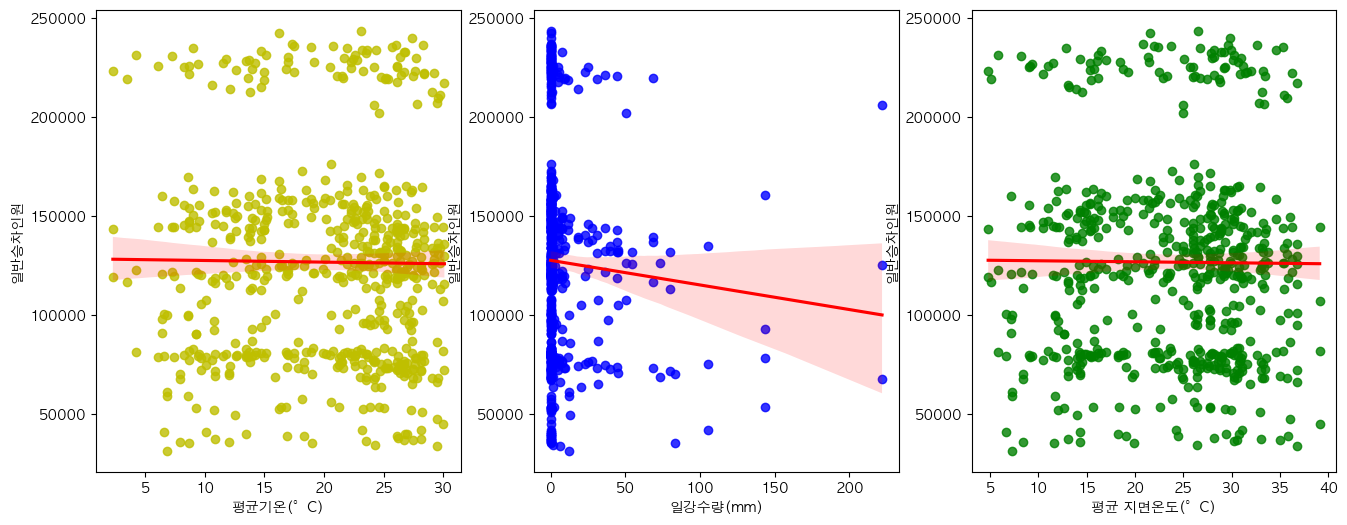

In [57]:
fig, axs = plt.subplots(figsize=(16, 6), ncols=3, nrows=1)
x_features = ["평균기온(°C)", "일강수량(mm)", "평균 지면온도(°C)"]
plot_color = ["y", "b", "g"]
for i, feature in enumerate(x_features):
    sns.regplot(x=X_train[feature], y=Y_train, ax=axs[i], color=plot_color[i], line_kws={'color': 'red'})

plt.show()